In [1]:
import opendatasets as od
od.download("https://www.kaggle.com/competitions/bike-sharing-demand/data")

Skipping, found downloaded files in "./bike-sharing-demand" (use force=True to force download)


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

## Data Load

In [3]:
data = pd.read_csv('bike-sharing-demand/train.csv')


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
data.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [7]:
data.tail(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10876,2012-12-19 14:00:00,4,0,1,1,17.22,21.210,50,12.9980,33,185,218
10877,2012-12-19 15:00:00,4,0,1,1,17.22,21.210,50,19.0012,28,209,237
10878,2012-12-19 16:00:00,4,0,1,1,17.22,21.210,50,23.9994,37,297,334
10879,2012-12-19 17:00:00,4,0,1,1,16.40,20.455,50,26.0027,26,536,562
10880,2012-12-19 18:00:00,4,0,1,1,15.58,19.695,50,23.9994,23,546,569
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88



# Data Fields
- datetime : hourly date + timestamp  
- season 
  - 1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday : whether the day is considered a holiday
- workingday : whether the day is neither a weekend nor holiday
- weather 
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp : temperature in Celsius
- atemp : "feels like" temperature in Celsius
- humidity : relative humidity
- windspeed : wind speed
- casual : number of non-registered user rentals initiated
- registered : number of registered user rentals initiate

# Split Datetime

In [8]:
# data copy
bi_df = data.copy()

In [9]:
bi_df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [10]:
def split_datetime(data):
    data['datetime'] = data['datetime'].astype('str')
    temp = data.datetime.str.split(' ')
    temp_date = temp.str[0].str.split('-')
    temp_time = temp.str[1].str.split(':')

    data['year'] = temp_date.str[0]
    data['month'] = temp_date.str[1]
    data['day'] = temp_date.str[2]

    data['hour'] = temp_time.str[0]
    data['min'] = temp_time.str[1]
    data['sec'] = temp_time.str[2]
    data.drop('datetime', axis=1, inplace=True)

In [11]:
split_datetime(bi_df)

In [12]:
bi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  year        10886 non-null  object 
 12  month       10886 non-null  object 
 13  day         10886 non-null  object 
 14  hour        10886 non-null  object 
 15  min         10886 non-null  object 
 16  sec         10886 non-null  object 
dtypes: float64(3), int64(8), object(6)
memory usage: 1.4+ MB


## EDA

In [13]:
eda_df = bi_df.copy()

In [14]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  year        10886 non-null  object 
 12  month       10886 non-null  object 
 13  day         10886 non-null  object 
 14  hour        10886 non-null  object 
 15  min         10886 non-null  object 
 16  sec         10886 non-null  object 
dtypes: float64(3), int64(8), object(6)
memory usage: 1.4+ MB


In [15]:
for i in range(6):
    eda_df = eda_df.astype({eda_df.columns[i+11]:'int'})

In [16]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  year        10886 non-null  int64  
 12  month       10886 non-null  int64  
 13  day         10886 non-null  int64  
 14  hour        10886 non-null  int64  
 15  min         10886 non-null  int64  
 16  sec         10886 non-null  int64  
dtypes: float64(3), int64(14)
memory usage: 1.4 MB


In [17]:
eda_df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
       'month', 'day', 'hour', 'min', 'sec'],
      dtype='object')

In [18]:
eda_df = eda_df[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered','year',
       'month', 'day', 'hour', 'min', 'sec', 'count']]

In [19]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  year        10886 non-null  int64  
 11  month       10886 non-null  int64  
 12  day         10886 non-null  int64  
 13  hour        10886 non-null  int64  
 14  min         10886 non-null  int64  
 15  sec         10886 non-null  int64  
 16  count       10886 non-null  int64  
dtypes: float64(3), int64(14)
memory usage: 1.4 MB


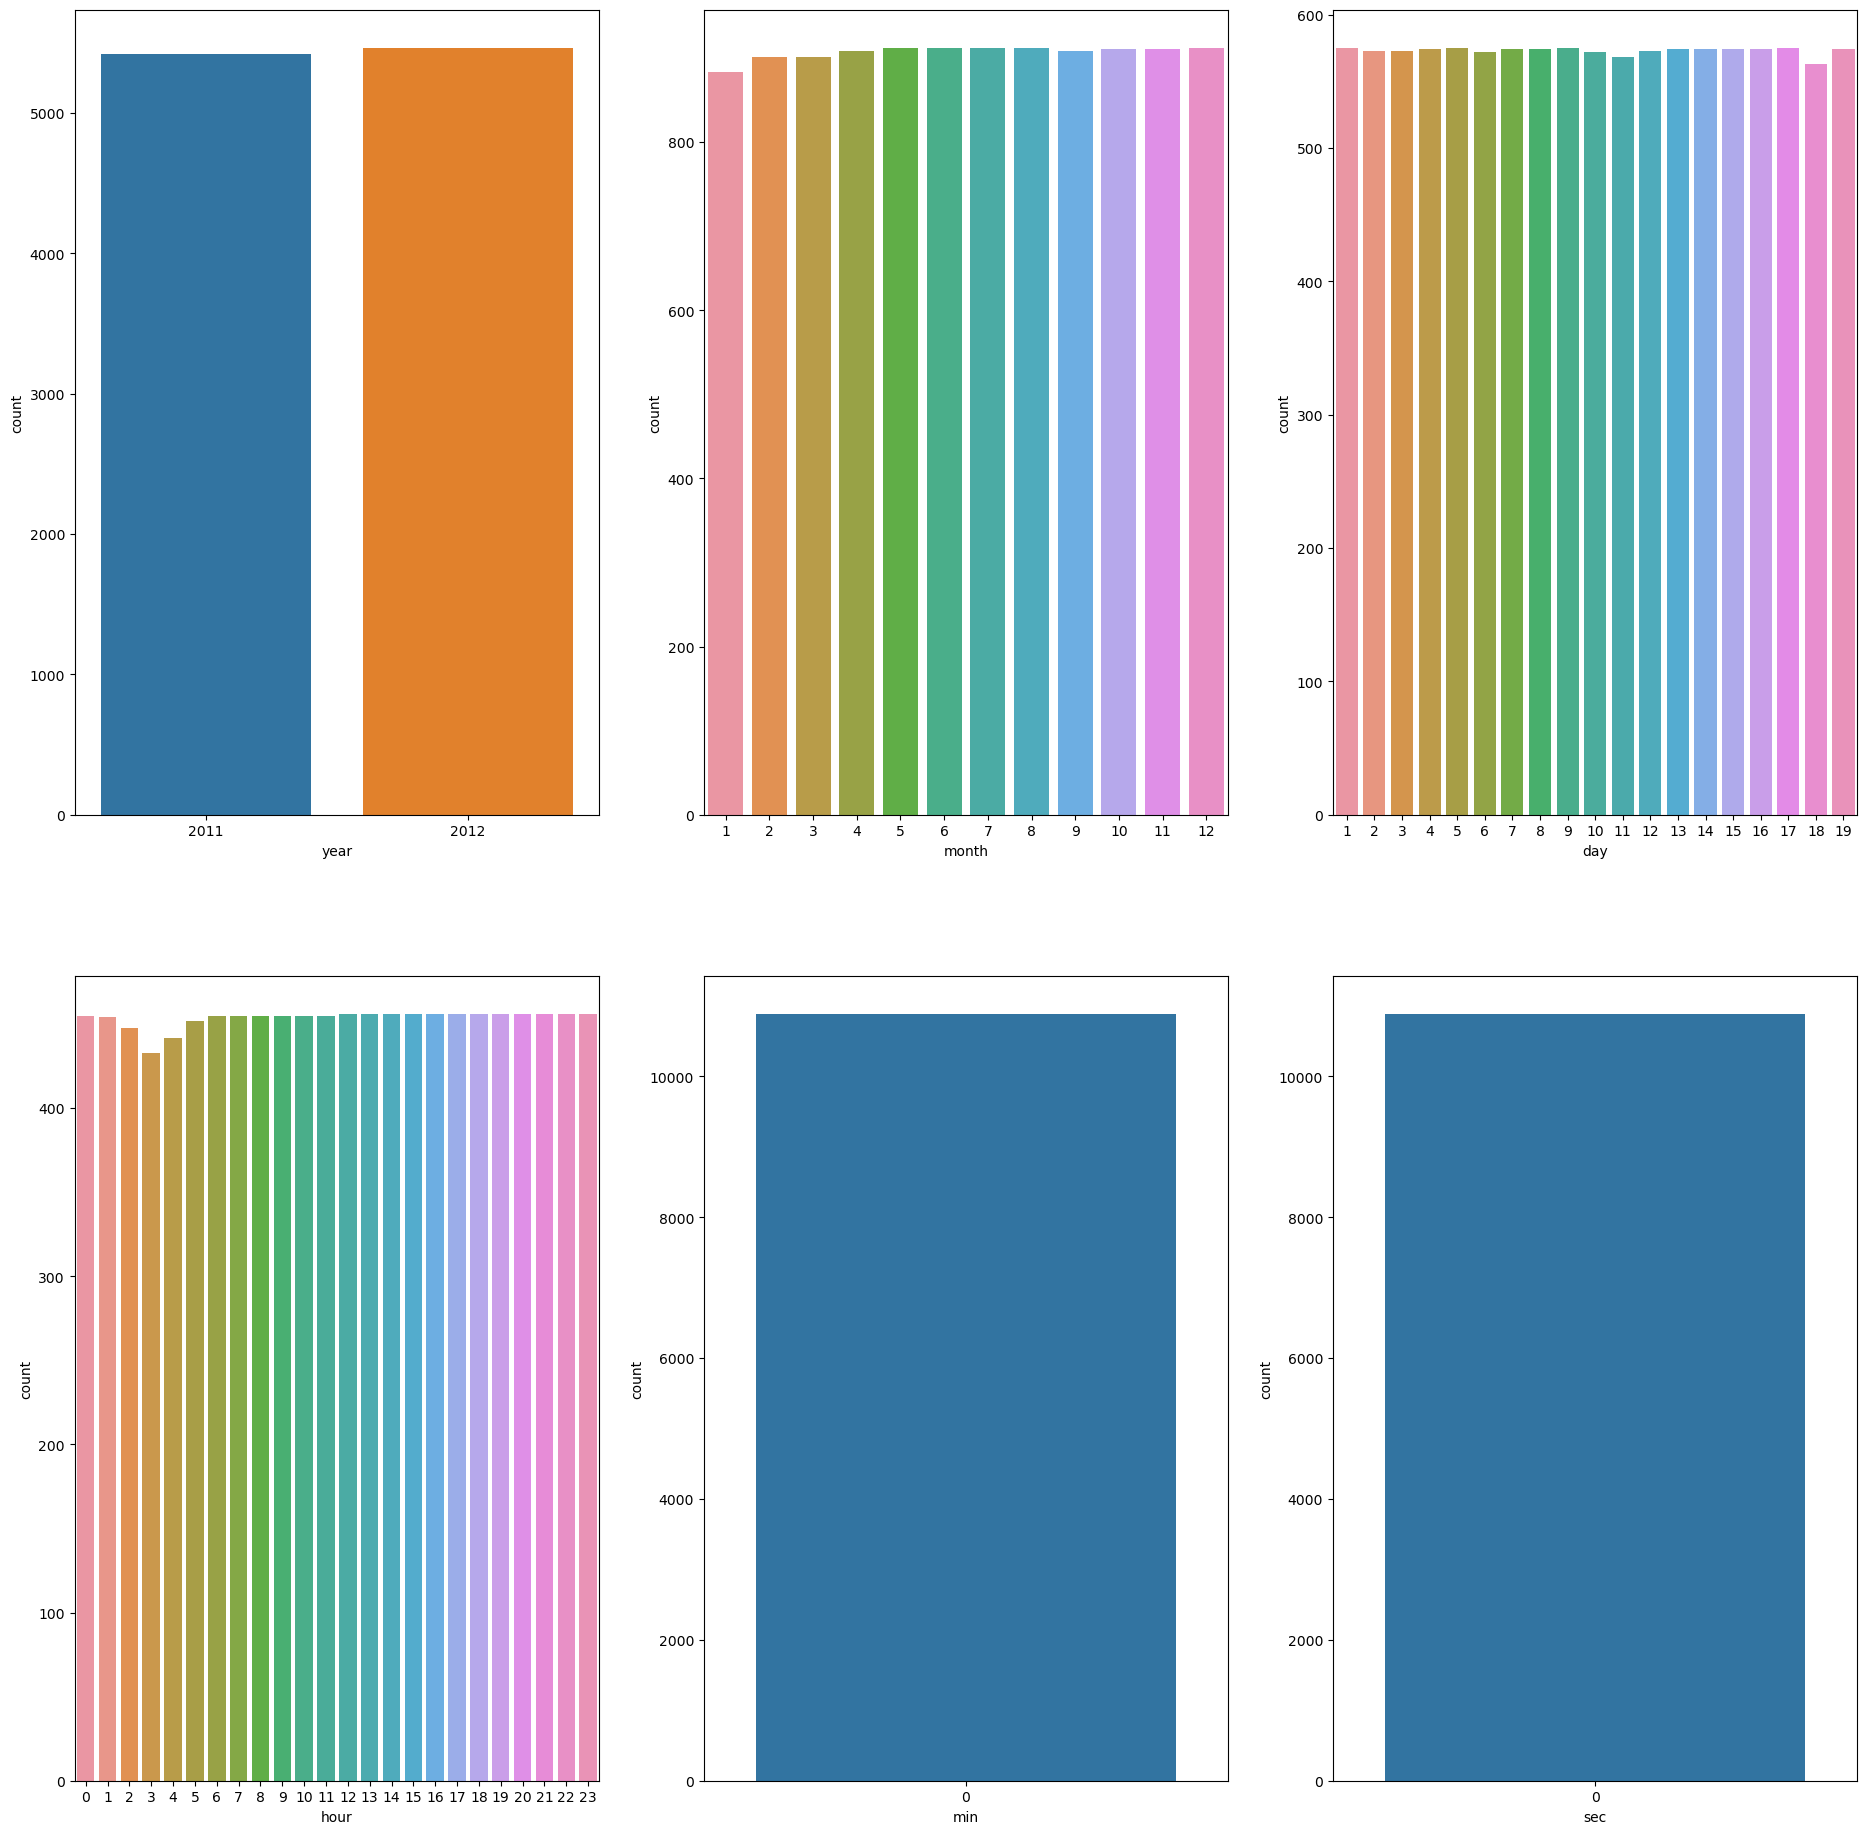

In [20]:
col_n = 3
row_n = 2
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(23, 23))

for i, col in enumerate(eda_df.columns[10:16]):
    sns.countplot(x=eda_df[col], ax=ax[int(i / col_n), int(i%col_n)])

# Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [22]:
def linear_regression(data):
    X = data.loc[:, data.columns != 'count']
    y = data[['count']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    # forest = RandomForestClassifier()
    # forest.fit(X_train, y_train)

    # importance = forest.feature_importances_
    # std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
    # indices = np.argsort(importance)[::-1]

    # # print feature ranking
    # print("Feature Ranking: ")

    # for f in range(X_train.shape[1]):
    #     print('{}.feature {} ({:.3f})'.format(f + 1, X_train.columns[indices][f], importance[indices[f]]))
    model = LinearRegression()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    MSE = metrics.mean_squared_error(y_test, pred)
    RMSE = metrics.mean_squared_error(y_test, pred, squared=False)

    print("MSE:{} , RMSE: {}".format(MSE, RMSE))

In [23]:
X_1 = eda_df.drop(['casual', 'registered'], axis=1)
X_2 = eda_df.drop(['casual'], axis=1)
X_3 = eda_df.drop(['registered'], axis=1)

In [24]:
linear_regression(X_1)

MSE:20091.372306443744 , RMSE: 141.74403799258627


In [25]:
linear_regression(X_2)

MSE:1142.2621494265813 , RMSE: 33.7973689719567


In [26]:
linear_regression(X_3)

MSE:12661.5718155841 , RMSE: 112.52365002782349


In [27]:
X_temp = X_test[['temp']].reset_index().drop('index', axis=1)

NameError: name 'X_test' is not defined

In [ ]:
X_temp['count'] = pred.round(1)

In [ ]:
X_hum = X_test[['humidity']].reset_index().drop('index', axis=1)
X_hum['count'] = pred.round(1)

<AxesSubplot: xlabel='humidity', ylabel='count'>

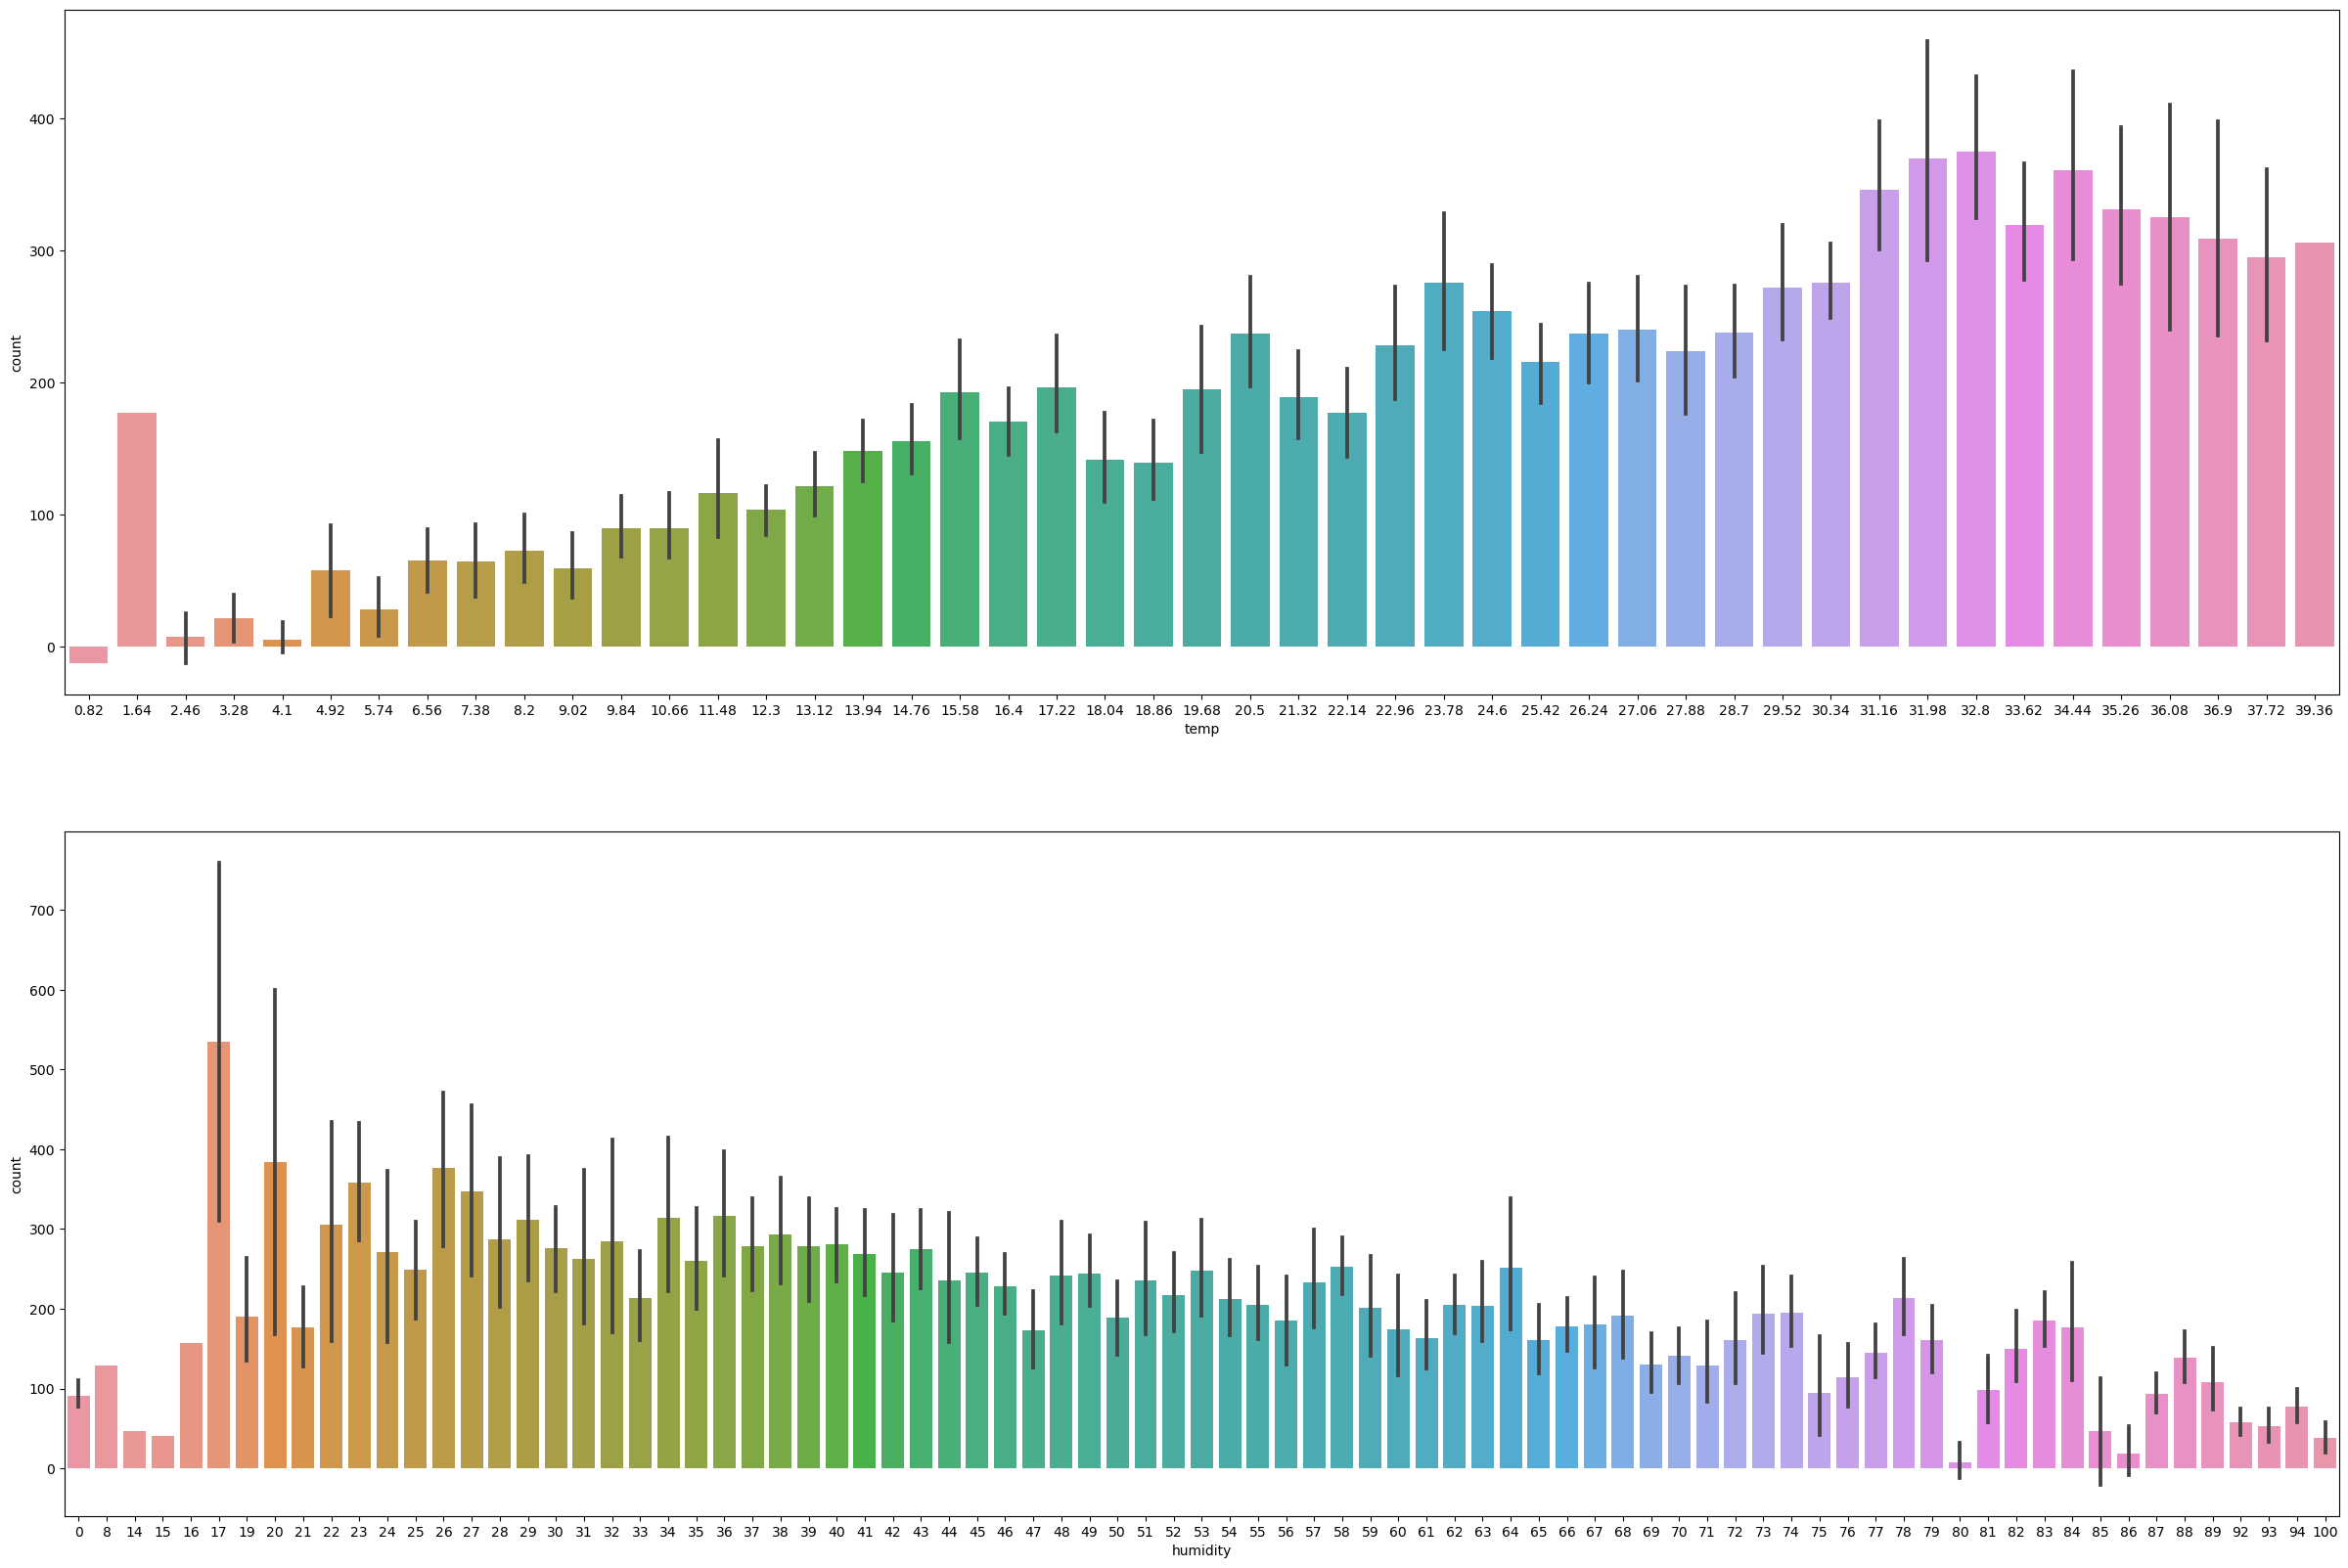

In [ ]:
fig, ax = plt.subplots(2, figsize=(30, 20))
sns.barplot(x='temp', y='count', data=X_temp, ax=ax[0])
sns.barplot(x='humidity', y='count', data=X_hum, ax=ax[1])